# Final Project Data Analysis

In [300]:
# Initialize packages to be used, enable matplotlib inline
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import csv
import pywt
import pylab as pl
import scipy as sp

### Haar Wavelet Python Example

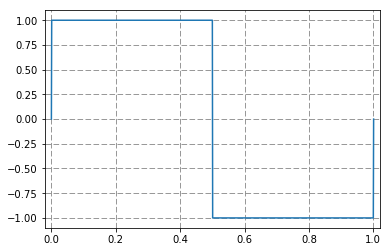

In [301]:
w = pywt.Wavelet('Haar')
phi, psi, x = w.wavefun(level=10)

fig, ax = plt.subplots()
ax.set_xlim(-.02, 1.02)
ax.grid(color='grey', linestyle='--')
ax.plot(x, psi);


### Data Cleaning
For the final project a significant amount of data had to be analyzed. The data we will be analyzing was obtained from the console log of the web application and placed into a text file. For ease of integer parsing, the X, Y and time step of each value are not correlated and are simply listed in order. Correlating them together is part of the initial cleaning of data.

In [302]:
# First we start by turning our text file lines into a clean list
f = open("data/base_trial.csv")
empty_list = []
for row in f:
    i = int(row.strip())
    empty_list.append(i)

# Now let's do a test print for verification
print(empty_list[0: 27])

[166, 19, 13217713, 161, 25, 13217729, 154, 38, 13217755, 147, 54, 13217771, 128, 95, 13217793, 110, 132, 13217814, 107, 143, 13217837, 107, 152, 13217845, 113, 189, 13217880]


In [303]:
# Now that we have our initial list, we need to organize the data
# into individual correlated arrays
complete_list = [empty_list[x:x+3] for x in range(0, len(empty_list),3)]

# Now let's do another small test print for verification
print(complete_list[0:9])

[[166, 19, 13217713], [161, 25, 13217729], [154, 38, 13217755], [147, 54, 13217771], [128, 95, 13217793], [110, 132, 13217814], [107, 143, 13217837], [107, 152, 13217845], [113, 189, 13217880]]


In [304]:
# Very nice! Now that we have the data in correlated arrays, lets combine it
# all together in a function so that we don't need to re-do this every time.
def dataClean(file):
    f = open(file)
    empty_list = []
    for row in f:
        i = int(row.strip())
        empty_list.append(i)
    complete_list = [empty_list[x:x+3] for x in range(0, len(empty_list),3)]
    return complete_list

In [305]:
# Now that the data has been reduced into a function, clean data from the
# console output can be produced on the fly!
print(dataClean("data/base_trial.csv")[1:9])

[[161, 25, 13217729], [154, 38, 13217755], [147, 54, 13217771], [128, 95, 13217793], [110, 132, 13217814], [107, 143, 13217837], [107, 152, 13217845], [113, 189, 13217880]]


In [306]:
# The function can be utilized for both .csv and .txt files without need
# to change anything. CSVs could potentially be useful in the future for
# removing or changing large pieces of data to introduce outlier behavior.
print(dataClean("data/base_trial.txt")[1:9])

[[161, 25, 13217729], [154, 38, 13217755], [147, 54, 13217771], [128, 95, 13217793], [110, 132, 13217814], [107, 143, 13217837], [107, 152, 13217845], [113, 189, 13217880]]


### Data Plotting
Now that we have clean/useful data, we can proceed to plot it.

In [307]:
# Building plotting function
def plot(file, xmin=0, xmax=800):
    working_list = dataClean(file)
    name = file
    x, y, t = [], [], []
    for i in working_list:
        x.append(i[0])
        # y is flipped in the 
        y.append(800-i[1])
        t.append(i[2])
    plt.title(file)
    plt.xlabel('X-position')
    plt.xlim([xmin,xmax])
    plt.ylim([0,800])
    plt.ylabel('Y-position')
    return plt.scatter(x,y, s=0.05)

# Let's also build some functions to build individual data-sets for later
def xyt_file(file):
    working_list = dataClean(file)
    name = file
    x, y, t = [], [], []
    for i in working_list:
        x.append(i[0])
        # y is flipped in the 
        y.append(800-i[1])
        #t.append(i[2])
    return x, y, t

In [308]:
print("These are x-values: " + str(xyt_file("data/base_trial2.txt")[0][0:9]))
print("These are y-values: " + str(xyt_file("data/base_trial2.txt")[1][0:9]))
print("These are time values: " + str(xyt_file("data/base_trial2.txt")[2][0:9]))

These are x-values: [433, 432, 432, 430, 429, 429, 429, 428, 427]
These are y-values: [800, 798, 795, 792, 789, 788, 787, 785, 783]
These are time values: []


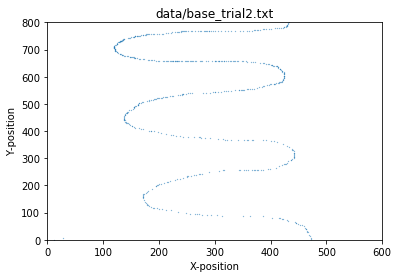

In [309]:
trial2 = plot(("data/base_trial2.txt"),0, 600)

Lets compare our data plotting to the true drawing from the web application:
![drawing](pictures/base_trial2.PNG)
Looks about right!

### Filtering

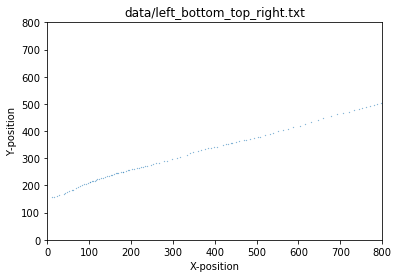

In [310]:
# Plot some data initially
data1 = plot(("data/left_bottom_top_right.txt"))

### Linear Regression

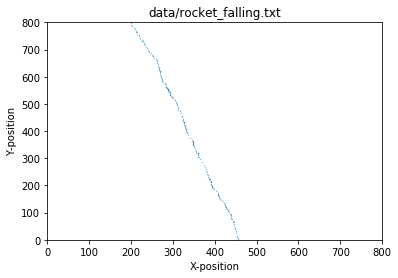

In [311]:
# Plot data of a mostly linear data-set, suppose we happen to have positional data of a rocket falling!
data2 = plot(("data/rocket_falling.txt"))

Given pairs of data coordinates creating a data-set (in this case X,Y coordinates) we are looking for a regression line of the form $ b_{1}x+b_{2}=y$ so that we minimize the sum of the square from each data point to the line created by using $b_{1}$ as the slope and $b_{2}$ as the y-intercept that would minimize the value of 

$$\sum|(b_{1}x_{i} + b_{2}) - y_{i}|^{2}$$

The parameter vector can be computed as $b = (b_{1}, b_{2})^{T}$ by finding the least-squares of:

$$\left( \begin{array}{ccc}
x_{1} & 1\\
x_{2} & 1\\
. & 1\\
. & 1\\
x_{n} & 1 \end{array} \right) b = \left( \begin{array}{ccc}
y_{1}\\
y_{2}\\
. \\
. \\
y_{n}\end{array} \right) $$

In [312]:
# Here we will create our parameter vector with some help from Numpy
from numpy import arange,array,ones,linalg

xi = xyt_file("data/rocket_falling.txt")[0]
yi = xyt_file("data/rocket_falling.txt")[1]
A = array([ xi, ones(230)])
# linearly generated sequence
b = linalg.lstsq(A.T,yi)[0]

print("The Slope is", b[0], "and the Y-intercept is", b[1])

The Slope is -3.19095506125 and the Y-intercept is 1467.78030638


We can then plot this on top of our usual data.

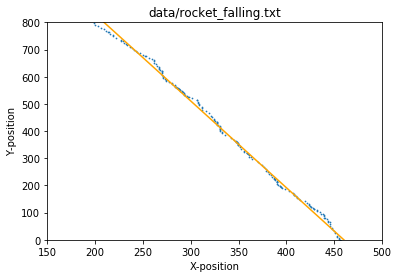

In [313]:
# We can then plot this on top of our usual data.
x_range = arange(0,800)
reg_line = b[0]*x_range+b[1]

plt.title("data/rocket_falling.txt")
plt.xlabel('X-position')
plt.xlim([150,500])
plt.ylim([0,800])
plt.ylabel('Y-position')
plt.scatter(xi,yi,s=0.5)
plt.plot(x_range,reg_line,color='orange')

That took forever, lets put all that into a function so we never have to do all that again.

In [314]:
# A function to plot data and regression
# with added ability to zoom into an x-area by adjusting x-range!
def reg_data(file, xmin = 0, xmax=800):
    # Here we will create our parameter vector with some help from Numpy
    from numpy import arange,array,ones,linalg
    import matplotlib.patches as mpatches
    import matplotlib.pyplot as plt

    xi = xyt_file(file)[0]
    yi = xyt_file(file)[1]
    A = array([ xi, ones(len(xi))])
    # linearly generated sequence
    b = linalg.lstsq(A.T,yi)[0]

    print("The Slope is", b[0], "and the Y-intercept is", b[1])
    x_range = arange(0,800)
    reg_line = b[0]*x_range+b[1]

    orange_patch = mpatches.Patch(color='orange', label='reg-fit')
    blue_patch = mpatches.Patch(color='blue', label='data')
    plt.legend(handles=[orange_patch, blue_patch])
    
    plt.title(file)
    plt.xlabel('X-position')
    plt.xlim([xmin,xmax])
    plt.ylim([0,800])
    plt.ylabel('Y-position')
    plt.scatter(xi,yi,s=0.5)
    plt.plot(x_range,reg_line,color='orange')

The Slope is -3.19095506125 and the Y-intercept is 1467.78030638


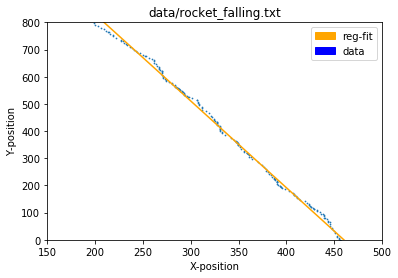

In [315]:
reg_data("data/rocket_falling.txt", 150, 500)

The Slope is -0.0506915487979 and the Y-intercept is 415.729613773


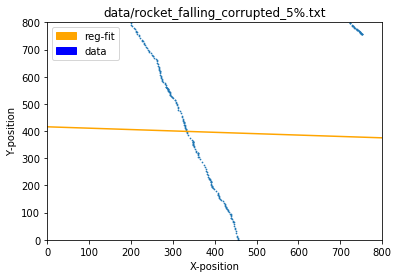

In [316]:
# Let's plot a gain with a little corrupted data
reg_data("data/rocket_falling_corrupted_5%.txt", 0, 800)

Even a relatively small amount of extreme outliers (about %5 of the original data-set) can seriously ruin the effectiveness of the regression fit!

The Slope is -3.10015720247 and the Y-intercept is 1441.59762679


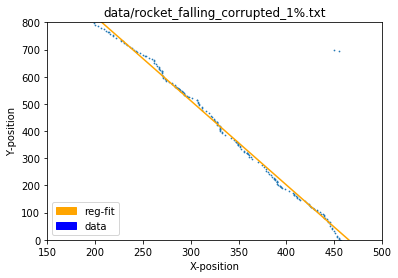

In [317]:
reg_data("data/rocket_falling_corrupted_1%.txt", 150, 500)

Just to see, lets make the data far noisier and see what happens if we treat the data as point clouds instead of averaged centroids, then see how outliers affect it.

In [318]:
def gauss_gen(mu, sigma, size):
    s = np.random.normal(mu,sigma, size)
    return s

In [319]:
xi2 = xyt_file("data/rocket_falling.txt")[0]
yi2 = xyt_file("data/rocket_falling.txt")[1]

# Generate large gaussian point cloud representing general rocket path.
x_gauss = []
y_gauss = []

for i in xi2:
    x_gauss = x_gauss + gauss_gen(i, 10, 20).tolist()

for i in yi2:
    y_gauss = y_gauss + gauss_gen(i, 10, 20).tolist()

The Slope is -3.14973889643 and the Y-intercept is 1453.1626944


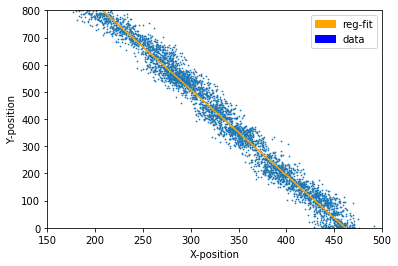

In [320]:
from numpy import arange,array,ones,linalg
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

A = array([ x_gauss, ones(len(x_gauss))])
# linearly generated sequence
b = linalg.lstsq(A.T,y_gauss)[0]

print("The Slope is", b[0], "and the Y-intercept is", b[1])
x_range = arange(0,800)
reg_line = b[0]*x_range+b[1]

orange_patch = mpatches.Patch(color='orange', label='reg-fit')
blue_patch = mpatches.Patch(color='blue', label='data')
plt.legend(handles=[orange_patch, blue_patch])

plt.xlabel('X-position')
plt.xlim([150,500])
plt.ylim([0,800])
plt.ylabel('Y-position')
plt.scatter(x_gauss,y_gauss,s=0.5)
plt.plot(x_range,reg_line,color='orange')

In [321]:
x_gauss1 = x_gauss
y_gauss2 = y_gauss + gauss_gen(700, 10, 20).tolist() + gauss_gen(705, 10, 20).tolist()

A = array([ x_gauss1, ones(len(x_gauss1))])
# linearly generated sequence
b = linalg.lstsq(A.T,y_gauss2)[0]

print("The Slope is", b[0], "and the Y-intercept is", b[1])
x_range = arange(0,800)
reg_line = b[0]*x_range+b[1]

orange_patch = mpatches.Patch(color='orange', label='reg-fit')
blue_patch = mpatches.Patch(color='blue', label='data')
plt.legend(handles=[orange_patch, blue_patch])

plt.xlabel('X-position')
plt.xlim([150,500])
plt.ylim([0,800])
plt.ylabel('Y-position')
plt.scatter(x_gauss1,y_gauss2,s=0.5)
plt.plot(x_range,reg_line,color='orange')

LinAlgError: Incompatible dimensions

357


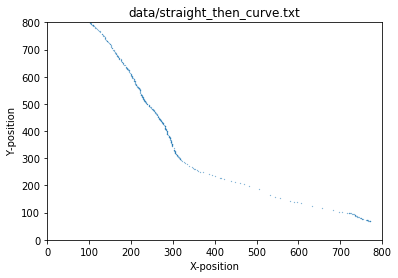

In [322]:
x_iter = xyt_file("data/straight_then_curve.txt")[0]
y_iter = xyt_file("data/straight_then_curve.txt")[1]

print(len(x_iter))
plot("data/straight_then_curve.txt")

The Slope is -0.432272983445 and the Y-intercept is 404.297009399


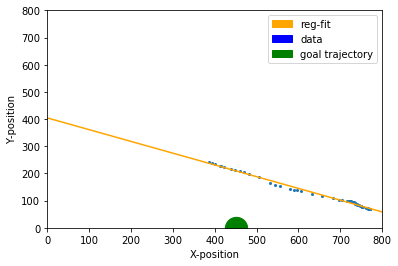

In [323]:
x_iter_p1 = x_iter[300:]
y_iter_p1 = y_iter[300:]

A = array([ x_iter_p1, ones(len(x_iter_p1))])
# linearly generated sequence
b = linalg.lstsq(A.T,y_iter_p1)[0]

print("The Slope is", b[0], "and the Y-intercept is", b[1])
x_range = arange(0,800)
reg_line = b[0]*x_range+b[1]

orange_patch = mpatches.Patch(color='orange', label='reg-fit')
blue_patch = mpatches.Patch(color='blue', label='data')
green_patch = mpatches.Patch(color='green', label='goal trajectory')
plt.legend(handles=[orange_patch, blue_patch, green_patch])

plt.xlabel('X-position')
plt.xlim([0,800])
plt.ylim([0,800])
plt.ylabel('Y-position')
plt.scatter(x_iter_p1,y_iter_p1,s=4)
plt.scatter(450, 0, s=500, color='green')
plt.plot(x_range,reg_line,color='orange')

In [324]:
import numpy as np
from pykalman import KalmanFilter
from matplotlib import pyplot as plt

x_kal = xyt_file("data/left_top_right_bottom.txt")[0]
y_kal = xyt_file("data/left_top_right_bottom.txt")[1]


Measured = []
for i in range(0,len(x_kal)-1):
    Measured.append([x_kal[i], y_kal[i]])

In [386]:
MarkedMeasure=np.ma.masked_less(Measured,0)

In [387]:
Transition_Matrix=[[1,0,1,0],[0,1,0,1],[0,0,1,0],[0,0,0,1]]
Observation_Matrix=[[1,0,0,0],[0,1,0,0]]
initcovariance=1.0e-3*np.eye(4)
transistionCov=1.0e-4*np.eye(4)
observationCov=1.0e-1*np.eye(2)
kf=KalmanFilter(transition_matrices=Transition_Matrix,
            observation_matrices =Observation_Matrix,
            initial_state_mean=initstate,
            initial_state_covariance=initcovariance,
            transition_covariance=transistionCov,
            observation_covariance=observationCov)

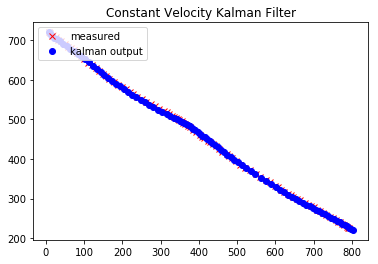

[[   7.          720.            3.           -3.        ]
 [  10.          717.            3.           -3.        ]
 [  13.29639181  713.90120273    3.11804938   -3.03934979]
 [  17.29569355  710.50681187    3.38936024   -3.14865616]
 [  22.39423868  706.47571063    3.81270748   -3.36722859]
 [  28.69220936  702.18802435    4.32853603   -3.55827409]
 [  36.59368894  696.81379242    4.97112898   -3.88487363]
 [  45.55566072  690.88512533    5.61062456   -4.21237259]
 [  54.93372241  684.84711586    6.16150073   -4.47931795]
 [  64.20069766  678.83541696    6.58462194   -4.68810501]
 [  73.23332138  672.67407638    6.90118848   -4.87861838]
 [  83.18161096  665.94915844    7.28115779   -5.10884939]
 [  92.92225259  659.01031093    7.58083791   -5.33182872]
 [ 102.91799097  651.22180944    7.87139001   -5.62740671]
 [ 112.88168807  643.64207686    8.12191923   -5.86117483]
 [ 123.02670366  635.80626492    8.36429703   -6.09774694]
 [ 133.31279329  628.21097107    8.59542814   -6.2778546

In [388]:
(filtered_state_means, filtered_state_covariances) = kf.filter(MarkedMeasure)
plt.plot(MarkedMeasure[:,0],MarkedMeasure[:,1],'xr',label='measured')
#plt.axis([0,520,0,700])
plt.plot(filtered_state_means[:,0],filtered_state_means[:,1],'ob',label='kalman output')
plt.legend(loc=2)
plt.title("Constant Velocity Kalman Filter")
plt.show()
print(filtered_state_means)

In [422]:
def kalman_plot(file, xmin=0, xmax=800, ymin=0, ymax=800):
    import numpy as np
    # Luckily, the Pykalman library will be very helpful and is well-supported!
    from pykalman import KalmanFilter
    from matplotlib import pyplot as plt

    x_kal = xyt_file(file)[0]
    y_kal = xyt_file(file)[1]

    # Retrieve the measured data into an array use-able by pykalman
    Measured = []
    for i in range(0,len(x_kal)-1):
        Measured.append([x_kal[i], y_kal[i]])

    # Use the numpy masking library to remove any measurements that
    # may be indicated as missing
    MarkedMeasure=np.ma.masked_less(Measured,0)
    
    # We can mark our matrices which will be fed into our Kalman Filter
    # Since there are two state measurements, x-position and y-position
    # the matrices are structured thusly:
    Transition_Matrix=[[1,0,1,0],[0,1,0,1],[0,0,1,0],[0,0,0,1]]
    Observation_Matrix=[[1,0,0,0],[0,1,0,0]]
    # It is important to mark an initial state, otherwise the Kalman filter
    # could initiate with errors and provide incorrect data.
    xinit=MarkedMeasure[0,0]
    yinit=MarkedMeasure[0,1]
    vxinit=MarkedMeasure[1,0]-MarkedMeasure[0,0]
    vyinit=MarkedMeasure[1,1]-MarkedMeasure[0,1]
    initstate=[xinit,yinit,vxinit,vyinit]
    
    # We use the np.eye function to return arrays with 1s in the diagonals.
    # The number inside the function is used to determine the array dimensions.
    # The transitional covariance is based on the state size (4) and
    # correlates with noise of Q.
    initcovariance=1.0e-4*np.eye(4)
    transistionCov=1.0e-4*np.eye(4)
    # The observation covariance is based on the observation size (2)
    # it correlates with noise of R.
    observationCov=1.0e-1*np.eye(2)
    
    # And finally, using the pykalman library we can apply all of our matrices
    # in a kalman filter function to derive use-able data.
    kf=KalmanFilter(transition_matrices=Transition_Matrix,
                observation_matrices =Observation_Matrix,
                initial_state_mean=initstate,
                initial_state_covariance=initcovariance,
                transition_covariance=transistionCov,
                observation_covariance=observationCov)

    (filtered_state_means, filtered_state_covariances) = kf.filter(MarkedMeasure)
    plt.plot(MarkedMeasure[:,0],MarkedMeasure[:,1],'xr',label='measured')
    plt.axis([xmin,xmax,ymin,ymax])
    plt.plot(filtered_state_means[:,0],filtered_state_means[:,1],'ob',label='kalman output', markersize=1)
    plt.legend()
    plt.title("Kalman Filtered")
    plt.show()

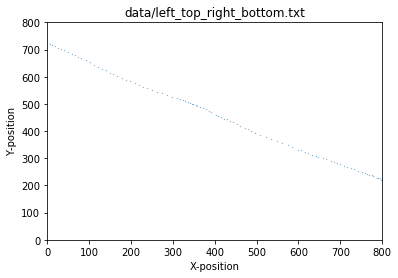

In [423]:
plot("data/left_top_right_bottom.txt")

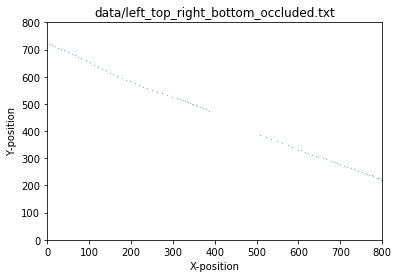

In [424]:
plot("data/left_top_right_bottom_occluded.txt")

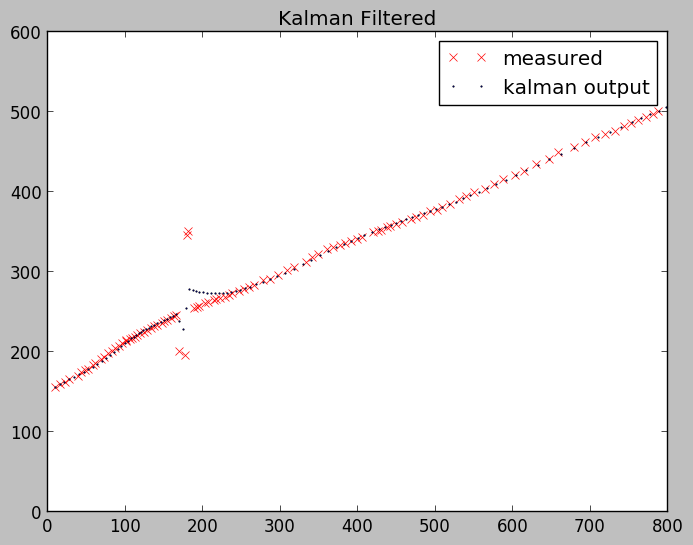

In [448]:
kalman_plot("data/left_bottom_top_right.txt", ymax=600)

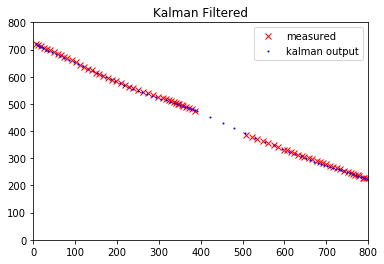

In [426]:
kalman_plot("data/left_top_right_bottom_occluded.txt")

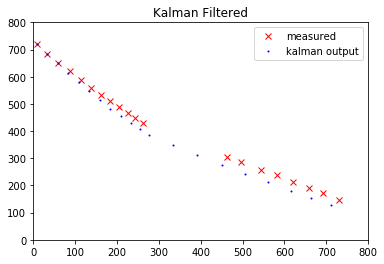

In [427]:
kalman_plot("data/sparsed_data_set.txt")

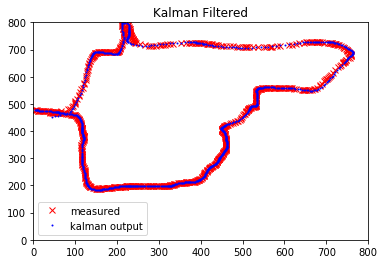

In [414]:
kalman_plot("data/store_trip1.txt")

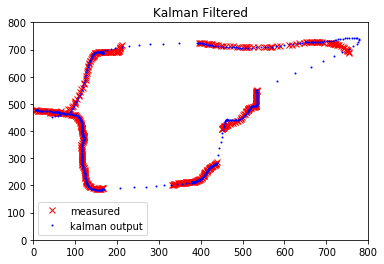

In [415]:
# Lets cut out 4/10 pieces of the data in equal intervals and see how it works.
kalman_plot("data/store_trip_occlusions.txt")

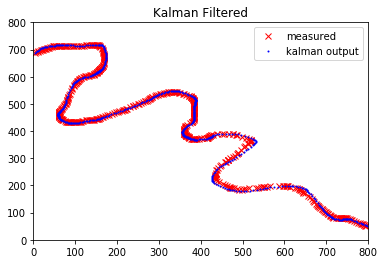

In [428]:
kalman_plot("data/random_path.txt")

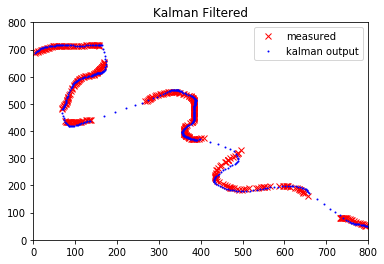

In [430]:
kalman_plot("data/random_path_occluded.txt")

In [443]:
def kalman_plot_background(file, xmin=0, xmax=900, ymin=0, ymax=900):
    import numpy as np
    # Luckily, the Pykalman library will be very helpful and is well-supported!
    from pykalman import KalmanFilter
    from matplotlib import pyplot as plt
    from matplotlib import image as mpimg
    from scipy.misc import imread
    
    img=mpimg.imread('pictures/boutique-floor-plan.png')
    imgplot = plt.imshow(img)

    x_kal = xyt_file(file)[0]
    y_kal = xyt_file(file)[1]

    # Retrieve the measured data
    Measured = []
    for i in range(0,len(x_kal)-1):
        Measured.append([x_kal[i], y_kal[i]])

    # Use the numpy masking library to remove any measurements that
    # may be indicated as missing
    MarkedMeasure=np.ma.masked_less(Measured,0)
    
    # We can mark our matrices which will be fed into our Kalman Filter
    Transition_Matrix=[[1,0,1,0],[0,1,0,1],[0,0,1,0],[0,0,0,1]]
    Observation_Matrix=[[1,0,0,0],[0,1,0,0]]
    xinit=MarkedMeasure[0,0]
    yinit=MarkedMeasure[0,1]
    vxinit=MarkedMeasure[1,0]-MarkedMeasure[0,0]
    vyinit=MarkedMeasure[1,1]-MarkedMeasure[0,1]
    initstate=[xinit,yinit,vxinit,vyinit]
    initcovariance=1.0e-3*np.eye(4)
    transistionCov=1.0e-4*np.eye(4)
    observationCov=1.0e-1*np.eye(2)
    kf=KalmanFilter(transition_matrices=Transition_Matrix,
                observation_matrices =Observation_Matrix,
                initial_state_mean=initstate,
                initial_state_covariance=initcovariance,
                transition_covariance=transistionCov,
                observation_covariance=observationCov)

    (filtered_state_means, filtered_state_covariances) = kf.filter(MarkedMeasure)
    plt.plot(MarkedMeasure[:,0],MarkedMeasure[:,1],'xr',label='measured')
    plt.axis([xmin,xmax,ymin,ymax])
    plt.plot(filtered_state_means[:,0],filtered_state_means[:,1],'ob',label='kalman output', markersize=1)
    plt.imshow(img, zorder=0)
    plt.legend()
    plt.title(file)
    plt.show()

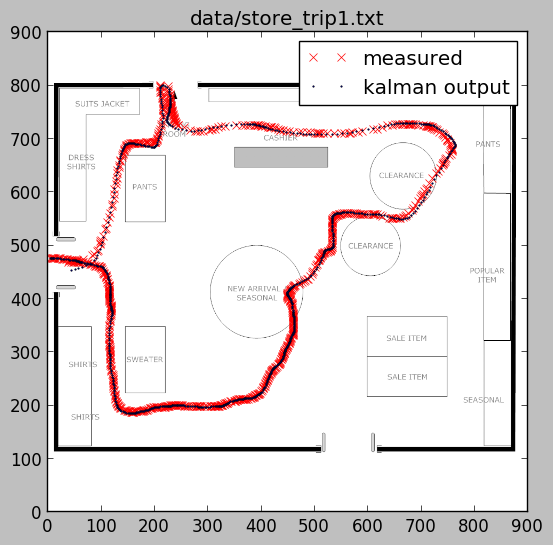

In [444]:
kalman_plot_background("data/store_trip1.txt")

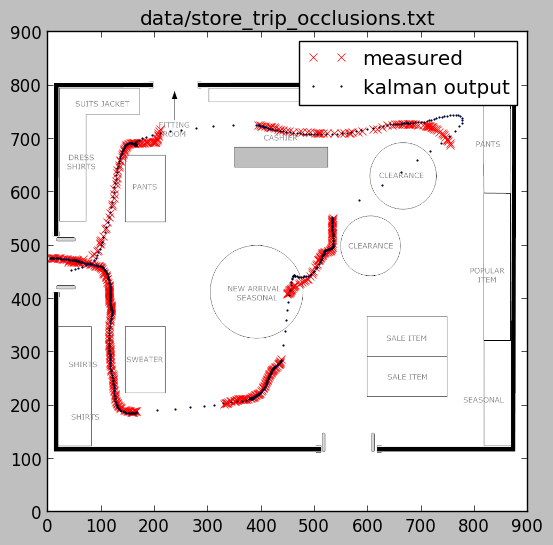

In [445]:
kalman_plot_background("data/store_trip_occlusions.txt")

![img](pictures/store_trip1.PNG)

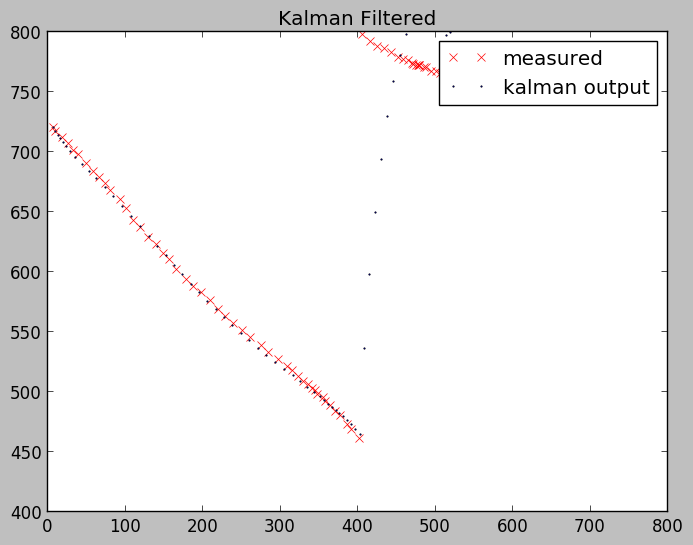

In [446]:
kalman_plot('data/left_top_right_bottom_contaminated.txt', ymin=400)

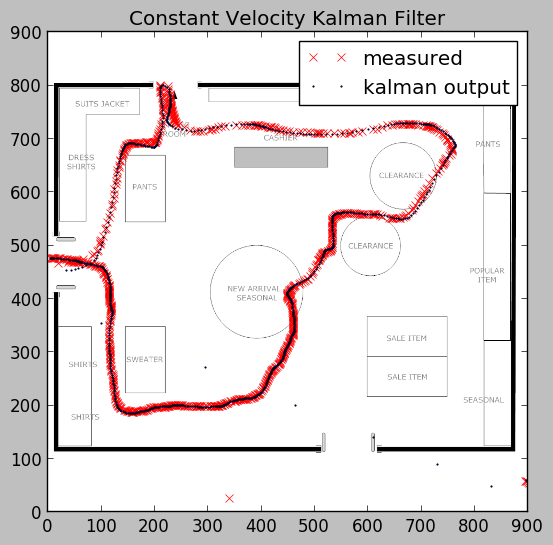

In [439]:
kalman_plot_background("data/stored_trip_outliers.txt")